In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the CSV and Perform Basic Data Cleaning

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

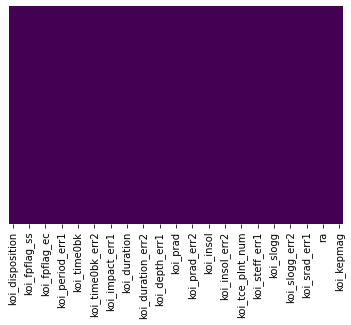

In [73]:
df = pd.read_csv("exoplanet_data.csv")
# visualize null values in data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df.isnull().sum()

plot shows there are no null values

In [74]:
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()

# Drop columns with column name having err
df = df[df.columns.drop(list(df.filter(regex='err\d$')))].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   6991 non-null   object 
 1   koi_fpflag_nt     6991 non-null   int64  
 2   koi_fpflag_ss     6991 non-null   int64  
 3   koi_fpflag_co     6991 non-null   int64  
 4   koi_fpflag_ec     6991 non-null   int64  
 5   koi_period        6991 non-null   float64
 6   koi_time0bk       6991 non-null   float64
 7   koi_impact        6991 non-null   float64
 8   koi_duration      6991 non-null   float64
 9   koi_depth         6991 non-null   float64
 10  koi_prad          6991 non-null   float64
 11  koi_teq           6991 non-null   int64  
 12  koi_insol         6991 non-null   float64
 13  koi_model_snr     6991 non-null   float64
 14  koi_tce_plnt_num  6991 non-null   int64  
 15  koi_steff         6991 non-null   int64  
 16  koi_slogg         6991 non-null   float64


In [75]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,164.488820,0.730631,5.549368,2.391190e+04,121.194193,1095.152768,8.263769e+03,276.038764,1.233729,5700.682449,4.305049,1.740749,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,67.020475,3.346956,6.425205,8.241240e+04,3519.737626,856.234809,1.775255e+05,824.788481,0.650089,802.060405,0.439238,5.903415,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,120.515914,0.000000,0.167000,7.500000e+00,0.140000,92.000000,2.000000e-02,1.600000,1.000000,2661.000000,0.047000,0.109000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,132.683917,0.198000,2.446000,1.604000e+02,1.400000,554.000000,2.227000e+01,12.400000,1.000000,5297.000000,4.209000,0.829000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,136.739230,0.539000,3.793000,4.245000e+02,2.420000,888.000000,1.466700e+02,23.700000,1.000000,5757.000000,4.436000,0.999000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,169.937005,0.891000,6.197500,1.533250e+03,15.965000,1397.500000,9.006700e+02,82.250000,1.000000,6110.000000,4.543000,1.357000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,180.013000,301.720760,52.336010,19.065000


We can see there are huge difference between mean and median(50%) of many columns. For example, column 10 'koi_prad', mean=121 and median=2.42. Which implies it is not normally distributed.

C:\Users\Abraham\anaconda3\envs\python31\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='koi_prad', ylabel='Density'>

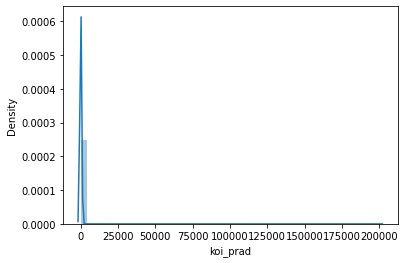

In [76]:
sns.distplot(df.iloc[:, 10])

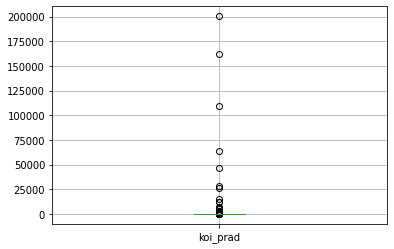

In [77]:
fig = df.boxplot(column='koi_prad')

 ### Outlier Detection
 Using Z Score

In [78]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_pt = detect_outliers(df.iloc[:, 10])
print(f"Number of Outlier values in this column: {len(outlier_pt)}")

Number of Outlier values in this column: 10


In [79]:
outlier_pt

[26042.9,
 46743.4,
 28199.3,
 11761.1,
 109061.0,
 15056.9,
 11943.8,
 64333.8,
 161858.0,
 200346.0]

Outlier Detection using Inter Quartile Range

In [80]:
# Extreme Outliers

outliers=[]
def detect_outliers_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lb = q1 - (3 * iqr)
    ub = q3 + (3 * iqr)
    for i in data:
        if ((i < lb) | (i > ub)):
            outliers.append(i)
    return outliers

outlier_pt = detect_outliers_iqr(df.iloc[:, 10])
print(f"Number of Outlier values in this column: {len(outlier_pt)}")

Number of Outlier values in this column: 599


* There are Outlier values in the dataset.  So best Models to go with are: SVM, Random Forest or KNN which are not Sensitive to Outliers.

* Otherwise, we should remove outliers or replace outliers with upper/lower bounds. Then perform Logistic regression or Neural Network Models which are sensitive to Outliers

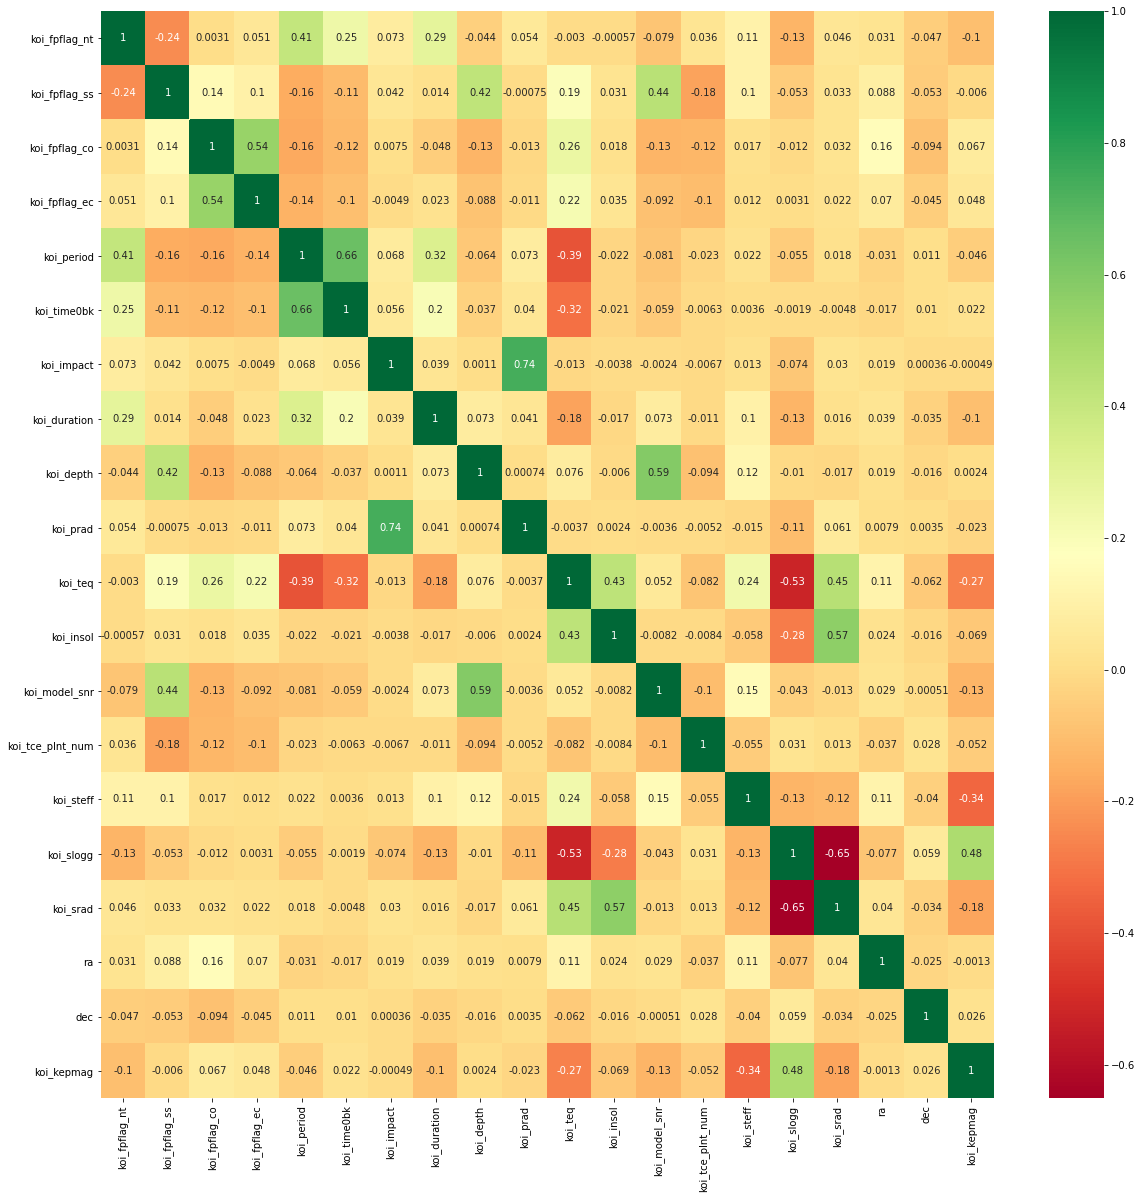

In [71]:
# correlation matrix
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
# heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

From the heatmap we can see 'dec' and 'ra' are the columns with not much influence/ correlation

# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
data = df.values
X = data[:, 1:21]
y = data[:, 0]
print(X.shape, y.shape)

(6991, 20) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model using SVC



In [10]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8267167381974249
Testing Data Score: 0.8162973552537527


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'kernel': ['rbf','linear','sigmoid'],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, cv=5, verbose=2)

In [12]:
# Train the model with GridSearch
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ................ C=5, gamma=0.0001, kernel=sigmoid, total=   1.1s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.001, kernel=rbf, total=   0.6s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.001, kernel=rbf, total=   0.6s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.001, kernel=rbf, total=   0.6s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.001, kernel=rbf, total=   0.6s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.001, kernel=rbf, total=   0.6s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] .................. C=5, gamma=0.001, kernel=linear, total=   1.2s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=2)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.8306478919172978


In [14]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)  
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE","CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.64      0.61      0.62       327
FALSE POSITIVE       0.69      0.69      0.69       393
     CANDIDATE       0.98      1.00      0.99       679

      accuracy                           0.82      1399
     macro avg       0.77      0.77      0.77      1399
  weighted avg       0.82      0.82      0.82      1399



model => SVC(kernel='linear', C=10, gamma=0.0001)

This is the SVC model with 83% accuracy rate 